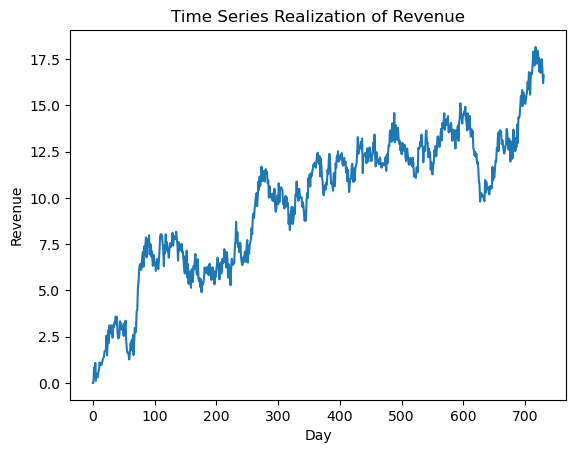

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'/Users/aceboogie/Desktop/teleco_time_series .csv')

# DataFrame and 'Revenue' is the column with time series data
df['Revenue'].plot(kind='line')
plt.title('Time Series Realization of Revenue')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()


In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Revenue'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.924612
p-value: 0.320573


In [34]:
train_size = int(len(df) * 0.75)
train, test = df['Revenue'][:train_size], df['Revenue'][train_size:]


In [35]:
import pandas as pd

# df is your DataFrame and 'Revenue' is the time series column
df['Revenue_diff'] = df['Revenue'].diff()

# Drop the first row, which is now NaN
df_cleaned = df.dropna()

# Print out the cleaned data
print(df_cleaned)


     Day    Revenue  Revenue_diff
1      2   0.000793      0.000793
2      3   0.825542      0.824749
3      4   0.320332     -0.505210
4      5   1.082554      0.762222
5      6   0.107654     -0.974900
..   ...        ...           ...
726  727  16.931559      0.170280
727  728  17.490666      0.559108
728  729  16.803638     -0.687028
729  730  16.194813     -0.608824
730  731  16.620798      0.425985

[730 rows x 3 columns]


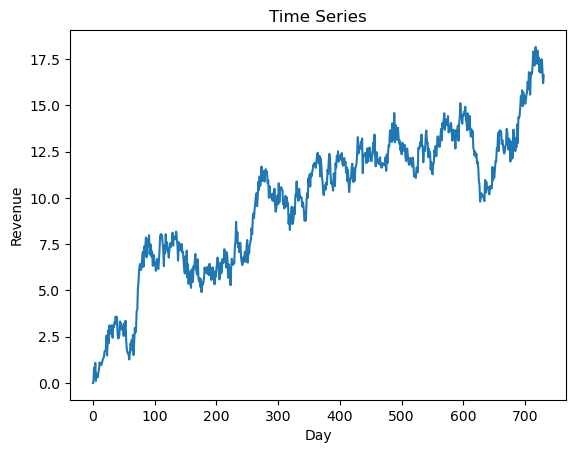

In [36]:
import matplotlib.pyplot as plt

df['Revenue'].plot(kind='line')
plt.title('Time Series')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()


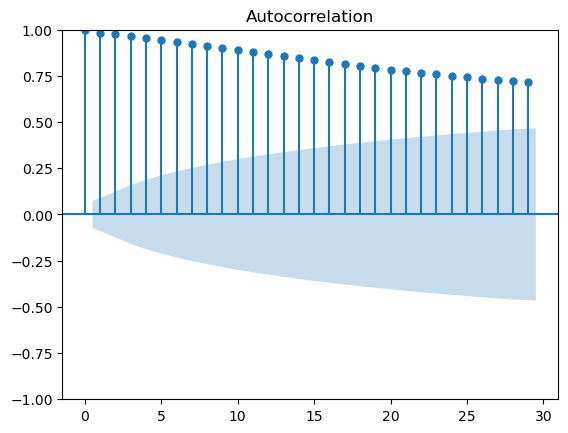

In [37]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Revenue'])
plt.show()


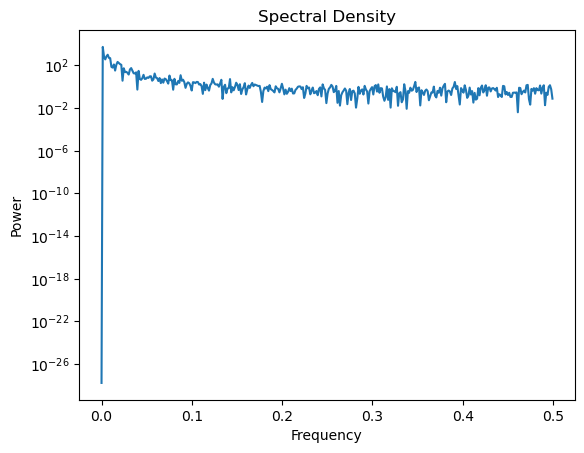

In [38]:
from scipy.signal import periodogram
import numpy as np

freq, power = periodogram(df['Revenue'])
plt.semilogy(freq, power)
plt.title('Spectral Density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()


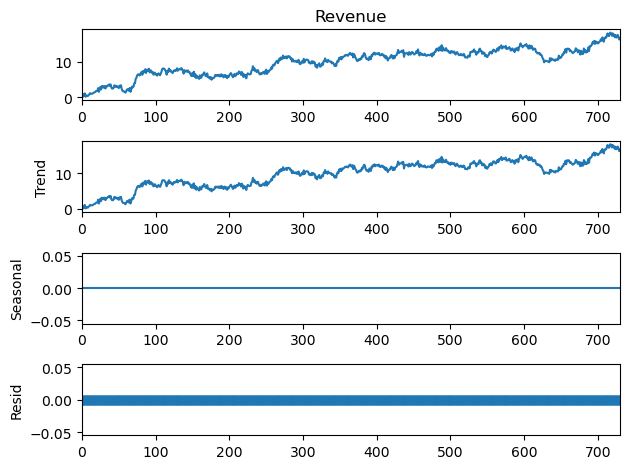

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Revenue'], model='additive', period=1) 
# period depends on the data. If I suspect a yearly seasonality and your data is in days, use 365. If data has a weekly seasonality use 7.
result.plot()
plt.show()


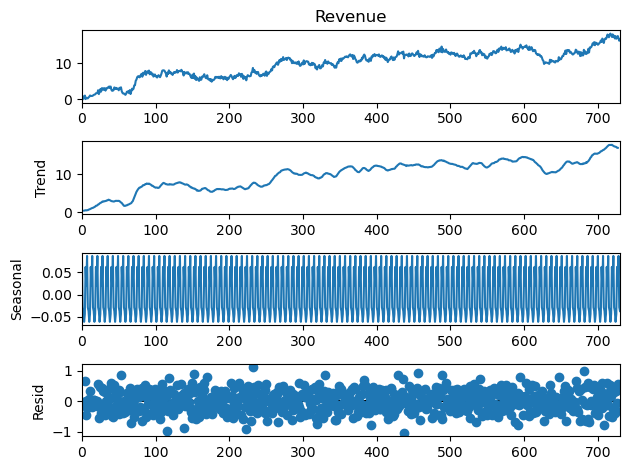

In [40]:
# Seasonal decomposition with a potential period
result = seasonal_decompose(df['Revenue'], model='additive', period=7)  # adjust the period based on findings
result.plot()
plt.show()


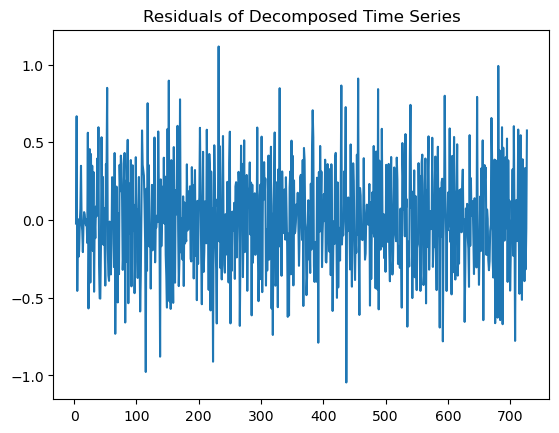

In [41]:
residuals = result.resid
residuals.plot(title='Residuals of Decomposed Time Series')
plt.show()


In [42]:
from pmdarima import auto_arima

# with df as our DataFrame and 'Revenue' is the time series column
smodel = auto_arima(df['Revenue'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2367.159, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1419.537, Time=0.81 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1969.738, Time=0.62 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2399.547, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1568.311, Time=0.25 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1320.755, Time=2.73 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.92 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.26 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2339.965, Time=1.54 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1147.041, Time=5.65 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1256.245, Time=1.98 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.55 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.26 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  731
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood                -557.398
Date:                             Wed, 07 Jun 2023   AIC                           1132.796
Time:                                     20:28:53   BIC                           1173.997
Sample:                                          0   HQIC                          1148.703
                                             - 731                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0060      0.003      1.773      0.076      -0.001       0.013
ar.L1          1.4283      0.074     19.209      0.000       1.283       1.574
ar.L2         -0.0140      0.126     -0.111      0.912      -0.261       0.233
ar.L3         -0.4257      0.071     -6.037      0.000      -0.564      -0.287
ma.L1         -0.9616      0.083    -11.540      0.000      -1.125      -0.798
ma.L2          0.0950      0.078      1.213      0.225      -0.058       0.248
ar.S.L12      -0.7091      0.038    -18.427      0.000      -0.784      -0.634
ar.S.L24      -0.3860      0.039     -9.779      0.000      -0.463      -0.309
sigma2         0.2737      0.016     17.550      0.000       0.243       0.304
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.97   Prob(JB):                         0.39
Heteroskedasticity (H):               1.06   Skew:                             0.01
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# p, d, q are the orders for AR, I, MA respectively. In this case, 1, 1, 0
p, d, q = 1, 1, 0

model = ARIMA(df['Revenue'], order=(p, d, q))
model_fit = model.fit()

# Forecasting the next 3 points
forecast_obj = model_fit.get_forecast(steps=3)

print('Forecast: ', forecast_obj.predicted_mean)
print('Confidence intervals: ', forecast_obj.conf_int())






Forecast:  731    16.422010
732    16.514776
733    16.471486
Name: predicted_mean, dtype: float64
Confidence intervals:       lower Revenue  upper Revenue
731      15.493777      17.350243
732      15.462773      17.566778
733      15.209422      17.733551


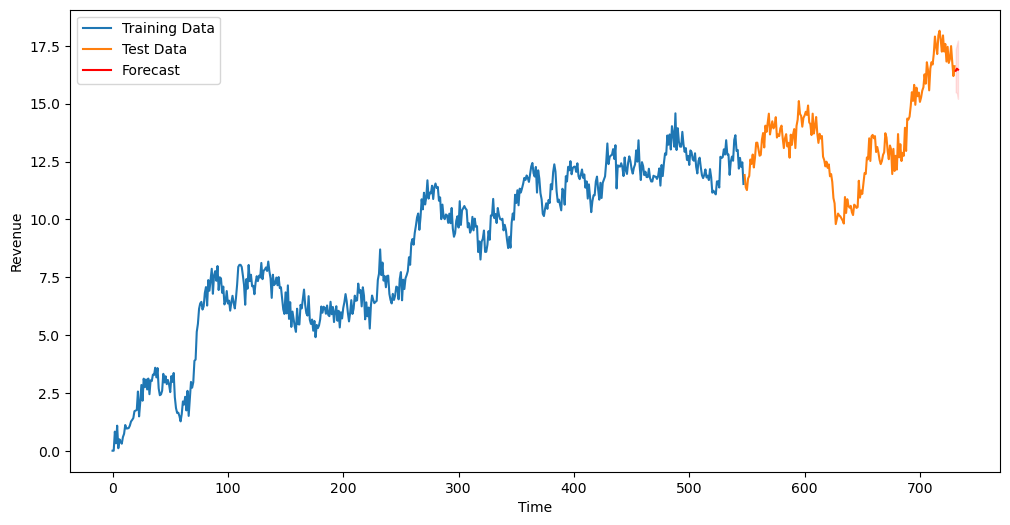

In [44]:
import matplotlib.pyplot as plt

#  forecast_obj is the forecast object
forecast = forecast_obj.predicted_mean
ci = forecast_obj.conf_int()

plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train.index, train, label='Training Data')

# Plot the test data
plt.plot(test.index, test, label='Test Data')

# Plot the forecast along with confidence interval
plt.plot(forecast.index, forecast, color='red', label='Forecast')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.1)

plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.show()



In [45]:
# Check for missing days
missing_days = set(range(df['Day'].min(), df['Day'].max() + 1)) - set(df['Day'])
print(f"Missing days: {sorted(missing_days)}")


Missing days: []


In [46]:
# After fitting the model
print('AIC of manual ARIMA model: ', model_fit.aic)


AIC of manual ARIMA model:  984.7100557722092


In [47]:
from statsmodels.tsa.arima.model import ARIMA

# p, d, q are the orders for AR, I, MA respectively. In this case, 1, 1, 0
p, d, q = 1, 1, 0

# Ensure the model is only fitted to the training set
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Forecast the values in the test set
forecast_obj = model_fit.get_forecast(steps=len(test))

print('Forecast: ', forecast_obj.predicted_mean)
print('Confidence intervals: ', forecast_obj.conf_int())



Forecast:  548    11.964662
549    11.762285
550    11.856391
551    11.812631
552    11.832980
         ...    
726    11.826521
727    11.826521
728    11.826521
729    11.826521
730    11.826521
Name: predicted_mean, Length: 183, dtype: float64
Confidence intervals:       lower Revenue  upper Revenue
548      11.042674      12.886649
549      10.716644      12.807926
550      10.602163      13.110618
551      10.422312      13.202950
552      10.301162      13.364797
..             ...            ...
726       3.385118      20.267923
727       3.361691      20.291351
728       3.338328      20.314714
729       3.315029      20.338012
730       3.291794      20.361247

[183 rows x 2 columns]


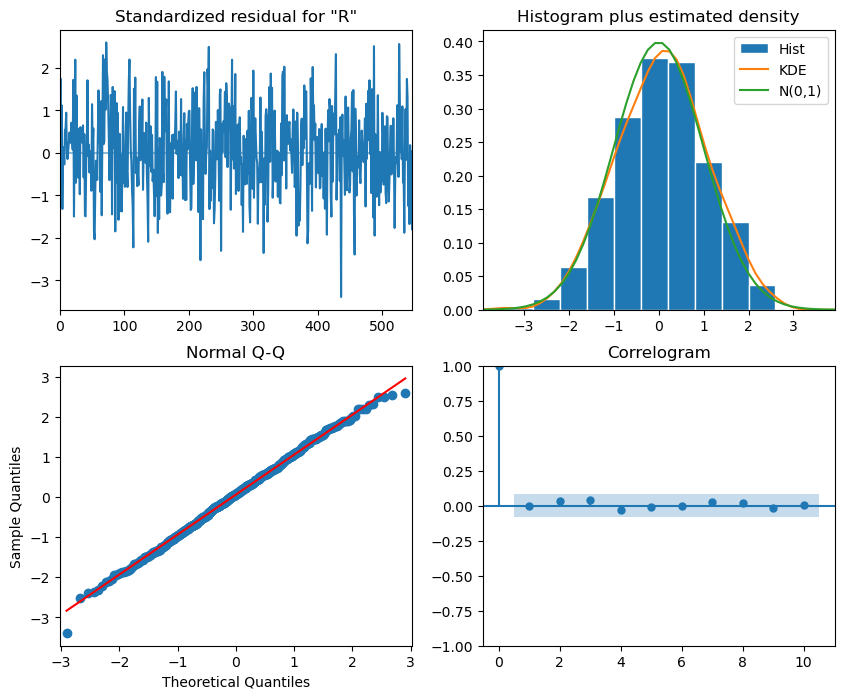

In [48]:
model_fit.plot_diagnostics(figsize=(10,8))
plt.show()


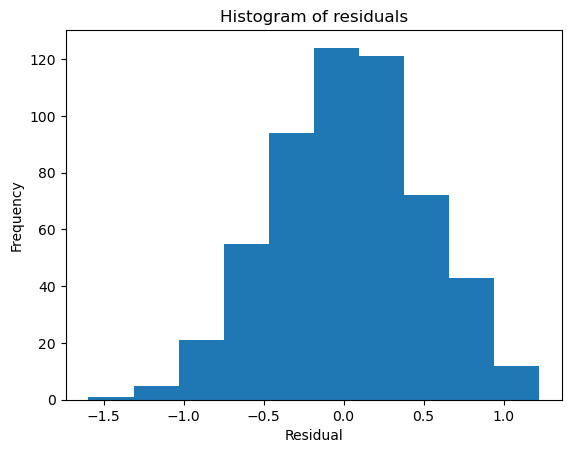

In [49]:
residuals = model_fit.resid
residuals.plot(kind='hist')
plt.xlabel('Residual')
plt.title('Histogram of residuals')
plt.show()


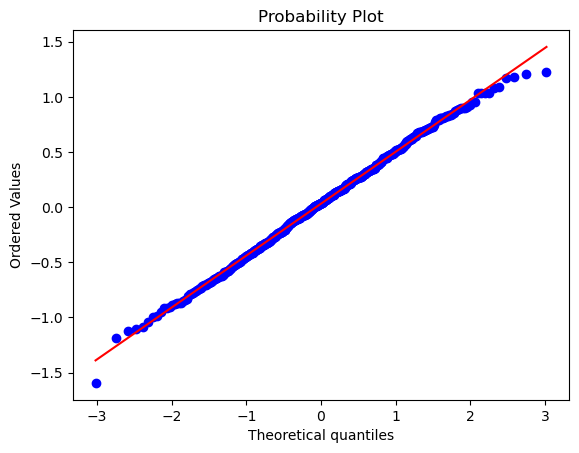

In [50]:
from scipy import stats

stats.probplot(residuals, plot=plt)
plt.show()


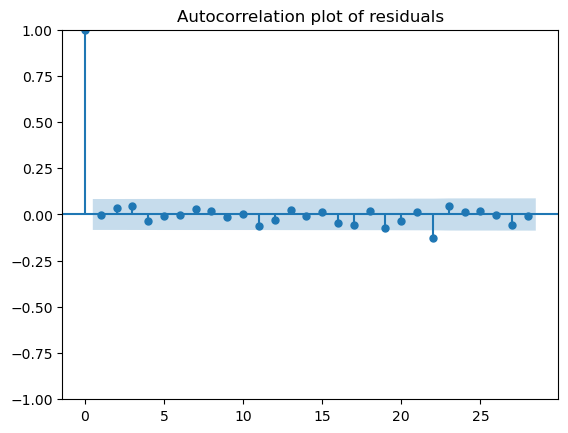

In [51]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals)
plt.title('Autocorrelation plot of residuals')
plt.show()


In [52]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  548
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -363.767
Date:                Wed, 07 Jun 2023   AIC                            731.534
Time:                        20:28:56   BIC                            740.143
Sample:                             0   HQIC                           734.899
                                - 548                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4650      0.037    -12.491      0.000      -0.538      -0.392
sigma2         0.2213      0.014     15.596      0.000       0.193       0.249
Ljung-Box (L1) (Q):                   0.00   Jarque-

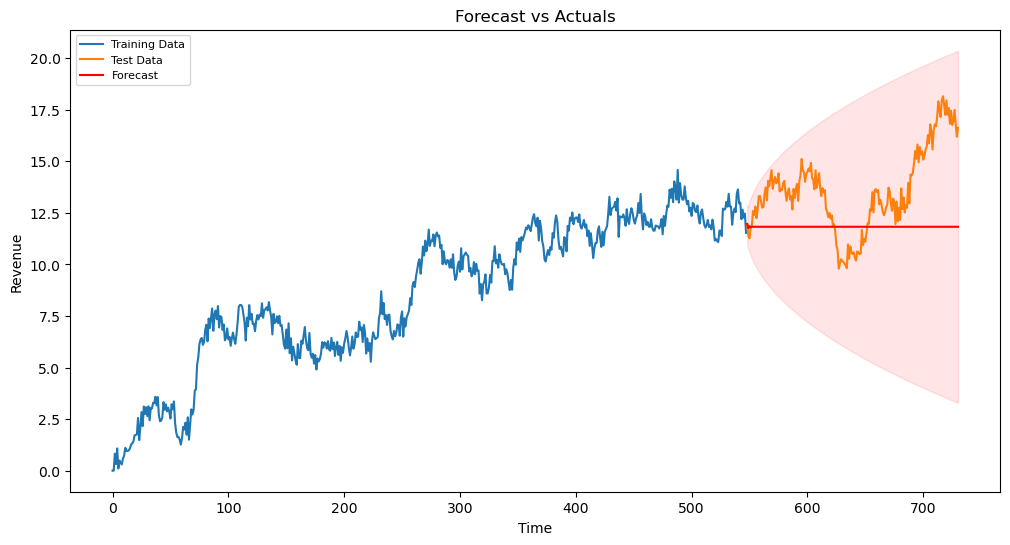

In [53]:
# Fitting the ARIMA model to the training set
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Forecast the values in the test set
forecast_obj = model_fit.get_forecast(steps=len(test))

# Extract the forecasted mean and confidence intervals
forecast = forecast_obj.predicted_mean
ci = forecast_obj.conf_int()

# Plotting the data
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train.index, train, label='Training Data')

# Plot the test data
plt.plot(test.index, test, label='Test Data')

# Plot the forecast along with confidence interval
plt.plot(forecast.index, forecast, color='red', label='Forecast')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.1)

plt.title('Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend(loc='upper left', fontsize=8)
plt.show()





In [54]:
# Clean DF
df_cleaned.to_csv('/Users/aceboogie/Desktop/cleaned_teleco_time_series.csv', index=False)


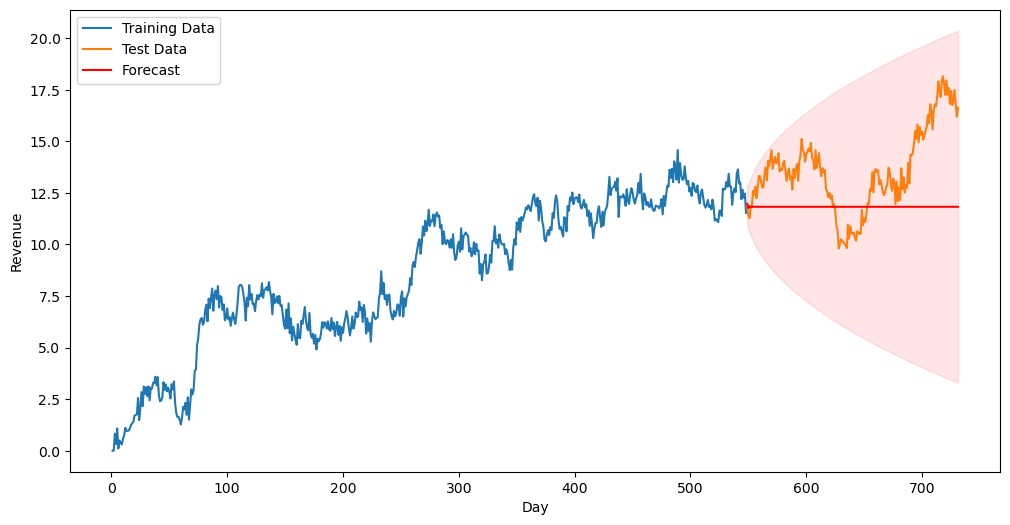

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load data
df = pd.read_csv(r'/Users/aceboogie/Desktop/teleco_time_series .csv')

# Split data
train_size = int(len(df) * 0.75)
train, test = df['Revenue'][:train_size], df['Revenue'][train_size:]

# Model data
p, d, q = 1, 1, 0  # Adjust these as necessary
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# Forecast
forecast_obj = model_fit.get_forecast(steps=len(test))
forecast = forecast_obj.predicted_mean
ci = forecast_obj.conf_int()

# Create forecast index (continuation of the 'Day' column)
forecast_index = df['Day'][train_size:train_size+len(forecast)]
forecast.index = forecast_index
ci.index = forecast_index

# Plot
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(df['Day'][:train_size], train, label='Training Data')

# Plot the test data
plt.plot(df['Day'][train_size:], test, label='Test Data')

# Plot the forecast along with confidence interval
plt.plot(forecast.index, forecast, color='red', label='Forecast')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.1)

plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.show()



In [60]:
from pmdarima import auto_arima

# Fit auto_arima function to dataset 
stepwise_fit = auto_arima(df['Revenue'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)          

# To print the summary 
stepwise_fit.summary() 


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.33 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2367.159, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1419.537, Time=0.91 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1969.738, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2399.547, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1568.311, Time=0.25 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1320.755, Time=2.99 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.35 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.65 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2339.965, Time=1.16 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1147.041, Time=4.62 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1256.245, Time=1.50 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.00 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.93 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  731
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood                -557.398
Date:                             Wed, 07 Jun 2023   AIC                           1132.796
Time:                                     20:38:58   BIC                           1173.997
Sample:                                          0   HQIC                          1148.703
                                             - 731                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0060      0.003      1.773      0.076      -0.001       0.013
ar.L1          1.4283      0.074     19.209      0.000       1.283       1.574
ar.L2         -0.0140      0.126     -0.111      0.912      -0.261       0.233
ar.L3         -0.4257      0.071     -6.037      0.000      -0.564      -0.287
ma.L1         -0.9616      0.083    -11.540      0.000      -1.125      -0.798
ma.L2          0.0950      0.078      1.213      0.225      -0.058       0.248
ar.S.L12      -0.7091      0.038    -18.427      0.000      -0.784      -0.634
ar.S.L24      -0.3860      0.039     -9.779      0.000      -0.463      -0.309
sigma2         0.2737      0.016     17.550      0.000       0.243       0.304
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.97   Prob(JB):                         0.39
Heteroskedasticity (H):               1.06   Skew:                             0.01
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
import itertools
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
            best_model = model_fit
    except:
        continue
print('Best ARIMA parameters:', best_pdq)


Best ARIMA parameters: (1, 1, 0)


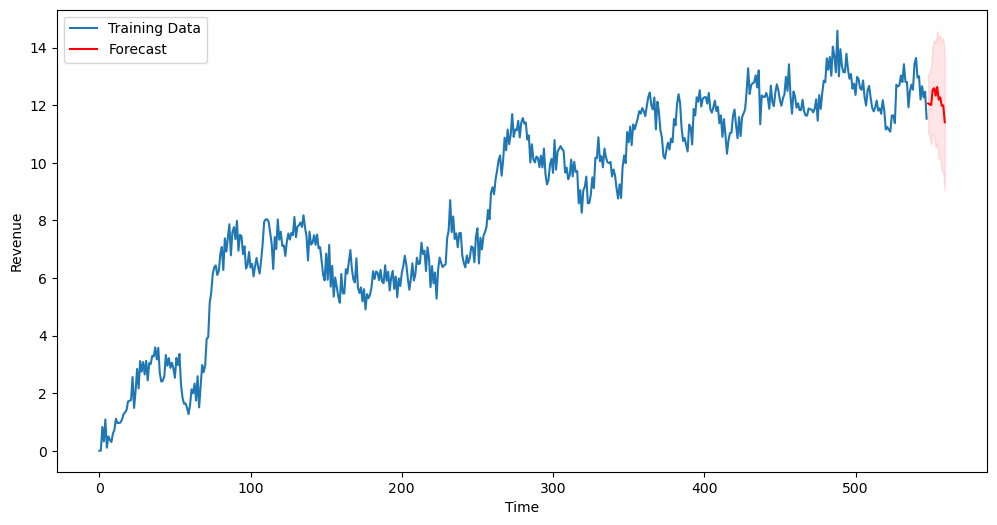

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model with parameters ARIMA(3,0,2)(2,1,0)[12]
model = SARIMAX(train, order=(3, 0, 2), seasonal_order=(2, 1, 0, 12))
results = model.fit(disp=False)

# Get the forecast of the next 12 steps
forecast = results.get_forecast(steps=12)

# Get the confidence intervals
ci = forecast.conf_int()

plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train.index, train, label='Training Data')

# Plot the forecast along with confidence interval
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.1)

plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.show()



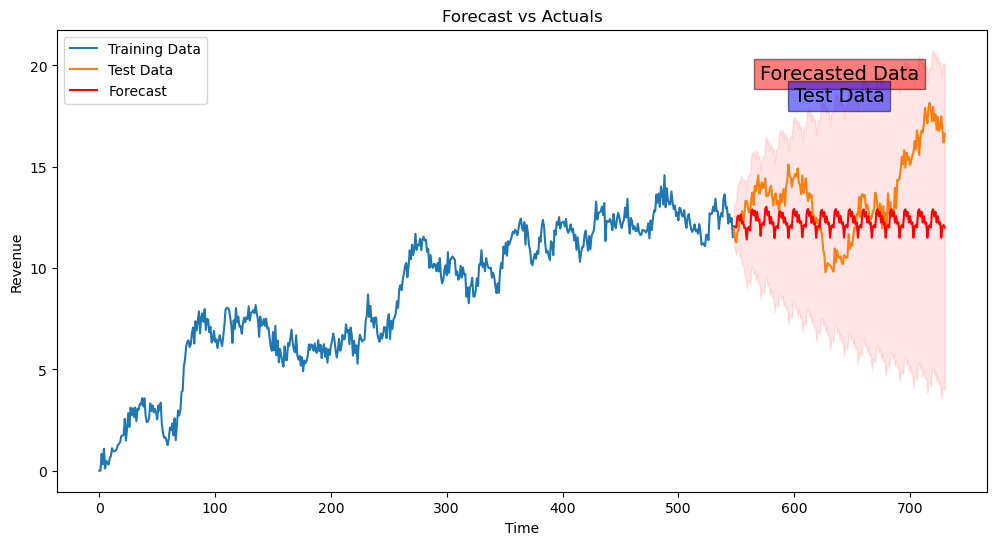

In [64]:
# Get the forecast of the next "n" steps where "n" is length of the test data
forecast = results.get_forecast(steps=len(test))

# Get the confidence intervals
ci = forecast.conf_int()

# Start plot
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(train.index, train, label='Training Data')

# Plot the test data
plt.plot(test.index, test, label='Test Data')

# Plot the forecast along with confidence interval
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='r', alpha=0.1)

# Annotating plot
plt.title('Forecast vs Actuals')
plt.xlabel('Time')
plt.ylabel('Revenue')

# Marking forecast area
min_ylim, max_ylim = plt.ylim()
plt.text(forecast.predicted_mean.index[int(len(test)/2)], max_ylim*0.9, 'Forecasted Data', horizontalalignment='center', verticalalignment='center', fontsize=14, bbox=dict(facecolor='red', alpha=0.5))

# Marking actual test area
plt.text(test.index[int(len(test)/2)], max_ylim*0.85, 'Test Data', horizontalalignment='center', verticalalignment='center', fontsize=14, bbox=dict(facecolor='blue', alpha=0.5))

plt.legend()
plt.show()
